In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []


In [2]:
image_files = [f for f in glob.glob('gender' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] 
    if label == "woman":
        label = 1
    elif label == "man":
        label = 0
    else:
        label = -1
        
    labels.append([label]) 



In [3]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")



In [4]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model



In [10]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=3)

opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

model.save('gender_detection.model')


  ...
    to  
  ['...']
Train for 28 steps, validate on 462 samples
Epoch 1/100
28/28 [==============================] - 55s 2s/step - loss: 0.8169 - accuracy: 0.7486 - val_loss: 0.4387 - val_accuracy: 0.7280
Epoch 2/100
28/28 [==============================] - 55s 2s/step - loss: 0.4180 - accuracy: 0.8572 - val_loss: 0.4362 - val_accuracy: 0.6941
Epoch 3/100
28/28 [==============================] - 57s 2s/step - loss: 0.3529 - accuracy: 0.8637 - val_loss: 0.4279 - val_accuracy: 0.7691
Epoch 4/100
28/28 [==============================] - 54s 2s/step - loss: 0.2820 - accuracy: 0.8971 - val_loss: 0.5301 - val_accuracy: 0.6768
Epoch 5/100
28/28 [==============================] - 56s 2s/step - loss: 0.2757 - accuracy: 0.8995 - val_loss: 0.5212 - val_accuracy: 0.7006
Epoch 6/100
28/28 [==============================] - 59s 2s/step - loss: 0.2579 - accuracy: 0.9034 - val_loss: 0.3407 - val_accuracy: 0.8355
Epoch 7/100
28/28 [==============================] - 55s 2s/step - loss: 0.2074 - acc

Epoch 58/100
28/28 [==============================] - 54s 2s/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.1177 - val_accuracy: 0.9654
Epoch 59/100
28/28 [==============================] - 54s 2s/step - loss: 0.0479 - accuracy: 0.9813 - val_loss: 0.1431 - val_accuracy: 0.9567
Epoch 60/100
28/28 [==============================] - 54s 2s/step - loss: 0.0394 - accuracy: 0.9850 - val_loss: 0.2310 - val_accuracy: 0.9372
Epoch 61/100
28/28 [==============================] - 55s 2s/step - loss: 0.0463 - accuracy: 0.9822 - val_loss: 0.1076 - val_accuracy: 0.9697
Epoch 62/100
28/28 [==============================] - 54s 2s/step - loss: 0.0419 - accuracy: 0.9850 - val_loss: 0.0770 - val_accuracy: 0.9769
Epoch 63/100
28/28 [==============================] - 54s 2s/step - loss: 0.0413 - accuracy: 0.9837 - val_loss: 0.4084 - val_accuracy: 0.8874
Epoch 64/100
28/28 [==============================] - 54s 2s/step - loss: 0.0529 - accuracy: 0.9787 - val_loss: 0.0741 - val_accuracy: 0.9820
Epoch 

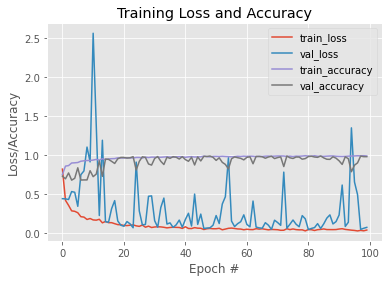

In [11]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.savefig('plot.png')

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [13]:
model = load_model('gender_detection.model')

webcam = cv2.VideoCapture(0)
    

In [14]:
classes = ['man','woman']

while webcam.isOpened():
 
    status, frame = webcam.read()
    
    face,confidence = cv.detect_face(frame)


    for idx, f in enumerate(face):
  
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        conf = model.predict(face_crop)[0] 

        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)
        
    cv2.imshow("gender detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()